# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">ESCREVER AQUI</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">ESCREVER AQUI</span>


### Dicionário de dados

<span style="color:red">ESCREVER AQUI</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  ESCREVER AQUI                                      | ESCREVER AQUI|
| id_cliente              |  ESCREVER AQUI                                      | ESCREVER AQUI|
| sexo                    |  ESCREVER AQUI                                      | ESCREVER AQUI|
| posse_de_veiculo        |  ESCREVER AQUI                                      | ESCREVER AQUI|
| posse_de_imovel         |  ESCREVER AQUI                                      | ESCREVER AQUI|
| qtd_filhos              |  ESCREVER AQUI                                      | ESCREVER AQUI|
| tipo_renda              |  ESCREVER AQUI                                      | ESCREVER AQUI|
| educacao                |  ESCREVER AQUI                                      | ESCREVER AQUI|
| estado_civil            |  ESCREVER AQUI                                      | ESCREVER AQUI|
| tipo_residencia         |  ESCREVER AQUI                                      | ESCREVER AQUI|
| idade                   |  ESCREVER AQUI                                      | ESCREVER AQUI|
| tempo_emprego           |  ESCREVER AQUI                                      | ESCREVER AQUI|
| qt_pessoas_residencia   |  ESCREVER AQUI                                      | ESCREVER AQUI|
| renda                   |  ESCREVER AQUI                                      | ESCREVER AQUI|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<span style="color:red">ESCREVER AQUI</span>


#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:red">ESCREVER AQUI</span>


In [1]:
%matplotlib inline


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


In [3]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [4]:
renda.head(1)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [5]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 1083.24it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
renda.isna().sum()




Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [8]:
renda["tempo_emprego"].value_counts().sum()

np.int64(12427)

In [9]:
renda = renda.dropna()



<span style="color:red">ESCREVER AQUI</span>


### Entendimento dos dados - Bivariadas




<span style="color:red">ESCREVER AQUI</span>


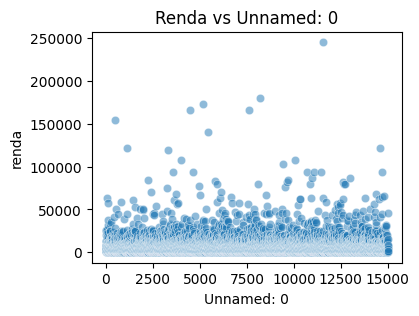

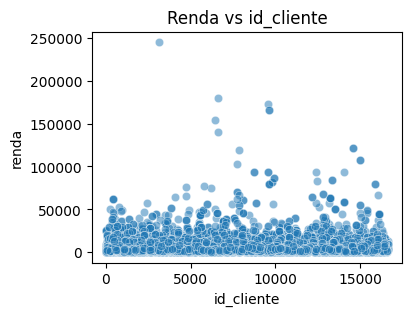

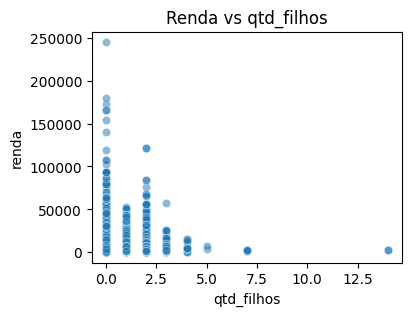

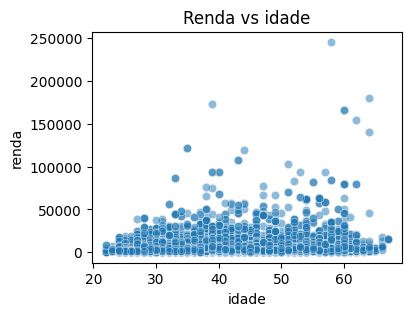

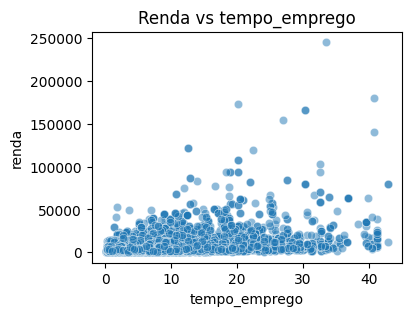

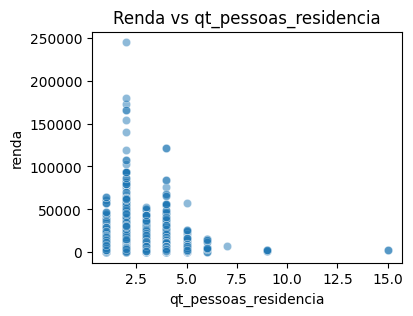

In [10]:

num_cols = renda.select_dtypes(include='number').columns.drop('renda')

for col in num_cols:
    plt.figure(figsize=(4,3))
    sns.scatterplot(x=col, y='renda', data=renda, alpha=0.5)
    plt.title(f'Renda vs {col}')
    plt.show()


## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


In [11]:
renda.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [12]:
renda.dtypes

Unnamed: 0                 int64
data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [13]:
renda = pd.get_dummies(
    renda,
    columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'educacao', 'tipo_residencia','estado_civil'],
    drop_first=True
)



In [14]:
renda.head(10)

,Unnamed: 0,data_ref,id_cliente,qtd_filhos,tipo_renda,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,...,educacao_Superior incompleto,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo
0,0,2015-01-01,15056,0,Empresário,26,6.602740,1.0,8060.34,False,...,False,True,False,False,False,False,False,True,False,False
1,1,2015-01-01,9968,0,Assalariado,28,7.183562,2.0,1852.15,True,...,False,True,False,False,False,False,False,False,False,False
2,2,2015-01-01,4312,0,Empresário,35,0.838356,2.0,2253.89,False,...,False,True,False,False,False,False,False,False,False,False
3,3,2015-01-01,10639,1,Servidor público,30,4.846575,3.0,6600.77,False,...,False,True,False,False,False,False,False,False,False,False
4,4,2015-01-01,7064,0,Assalariado,33,4.293151,1.0,6475.97,True,...,False,False,False,False,False,True,False,True,False,False
5,5,2015-01-01,10581,0,Assalariado,39,4.345205,2.0,1445.87,False,...,False,True,False,False,False,False,False,False,False,False
6,6,2015-01-01,7129,0,Empresário,55,6.378082,1.0,1726.03,False,...,False,True,False,False,False,False,False,False,False,True
7,7,2015-01-01,9952,0,Empresário,36,3.104110,2.0,2515.98,False,...,False,True,False,False,False,False,False,False,False,False
8,8,2015-01-01,883,0,Assalariado,50,18.605479,2.0,3420.34,False,...,False,True,False,False,False,False,False,False,False,False
9,9,2015-01-01,8070,0,Assalariado,60,10.558904,2.0,12939.14,True,...,False,True,False,False,False,False,False,False,False,False


In [15]:


df = renda.drop(columns=['id_cliente', 'tipo_renda', 'data_ref','tipo_renda'])


In [16]:
#df.dtypes
df.columns

Index(['Unnamed: 0', 'qtd_filhos', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'sexo_M', 'posse_de_veiculo_True',
       'posse_de_imovel_True', 'educacao_Pós graduação', 'educacao_Secundário',
       'educacao_Superior completo', 'educacao_Superior incompleto',
       'tipo_residencia_Casa', 'tipo_residencia_Com os pais',
       'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio',
       'tipo_residencia_Governamental', 'estado_civil_Separado',
       'estado_civil_Solteiro', 'estado_civil_União', 'estado_civil_Viúvo'],
      dtype='object')

In [17]:
y = df["renda"]
X = df.drop(columns=["renda"])


In [18]:


df.columns = (
    df.columns
    .str.replace(" ", "_", regex=False)
    .str.replace("ã", "a")
    .str.replace("é", "e")
    .str.replace("í", "i")
    .str.replace("ó", "o")
    .str.replace("á", "a")
    .str.replace("ú", "u")
    .str.replace("ç", "c")
)



In [19]:
df.columns

Index(['Unnamed:_0', 'qtd_filhos', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'sexo_M', 'posse_de_veiculo_True',
       'posse_de_imovel_True', 'educacao_Pos_graduacao', 'educacao_Secundario',
       'educacao_Superior_completo', 'educacao_Superior_incompleto',
       'tipo_residencia_Casa', 'tipo_residencia_Com_os_pais',
       'tipo_residencia_Comunitario', 'tipo_residencia_Estudio',
       'tipo_residencia_Governamental', 'estado_civil_Separado',
       'estado_civil_Solteiro', 'estado_civil_Uniao', 'estado_civil_Viuvo'],
      dtype='object')

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo

In [20]:


formula = (
    "renda ~ qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia + "
    "sexo_M + posse_de_veiculo_True + posse_de_imovel_True + "
    "educacao_Pos_graduacao + educacao_Secundario + "
    "educacao_Superior_completo + educacao_Superior_incompleto + "
    "tipo_residencia_Casa + tipo_residencia_Com_os_pais + "
    "tipo_residencia_Comunitario + tipo_residencia_Estudio + "
    "tipo_residencia_Governamental + "
    "estado_civil_Separado + estado_civil_Solteiro + estado_civil_Uniao + estado_civil_Viuvo"
)


m1 = smf.ols(formula, data=df).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     211.8
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        08:17:30   Log-Likelihood:            -1.2880e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12406   BIC:                         2.578e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [21]:
formula = (
    "renda ~ sexo_M + posse_de_imovel_True + idade + tempo_emprego"
)


m1 = smf.ols(formula, data=df).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1047.
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        08:17:30   Log-Likelihood:            -1.2882e+05
No. Observations:               12427   AIC:                         2.577e+05
Df Residuals:                   12422   BIC:                         2.577e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

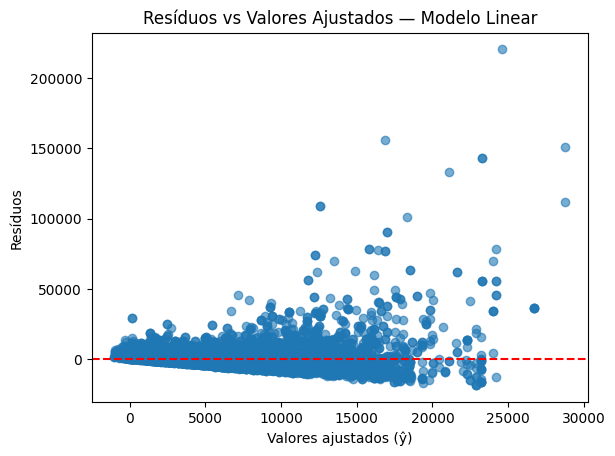

In [22]:
res = m1.resid
fitted = m1.fittedvalues

plt.scatter(fitted, res, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores ajustados (ŷ)")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Ajustados — Modelo Linear")
plt.show()

In [23]:
formula_logy = "np.log(renda) ~ sexo_M + posse_de_imovel_True + idade + tempo_emprego"
m3 = smf.ols(formula=formula_logy, data=df).fit()
print(m3.summary())


                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1637.
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        08:17:31   Log-Likelihood:                -13685.
No. Observations:               12427   AIC:                         2.738e+04
Df Residuals:                   12422   BIC:                         2.742e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

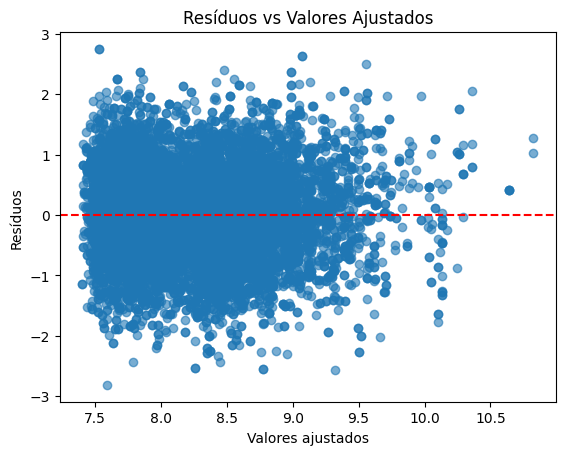

In [24]:
res = m3.resid
fitted = m3.fittedvalues

plt.scatter(fitted, res, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores ajustados")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Valores Ajustados")
plt.show()

R ajustado ficou bem melhor com Log

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


In [25]:
X = df[["sexo_M", "posse_de_imovel_True", "idade", "tempo_emprego"]]
y = np.log(df["renda"])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [29]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [30]:
print(f"R²_treino={r2_train:.3f} | R²_teste={r2_test:.3f}")
print(f"MSE_treino={mse_train:.3f} | MSE_teste={mse_test:.3f}")

R²_treino=0.341 | R²_teste=0.356
MSE_treino=0.532 | MSE_teste=0.524


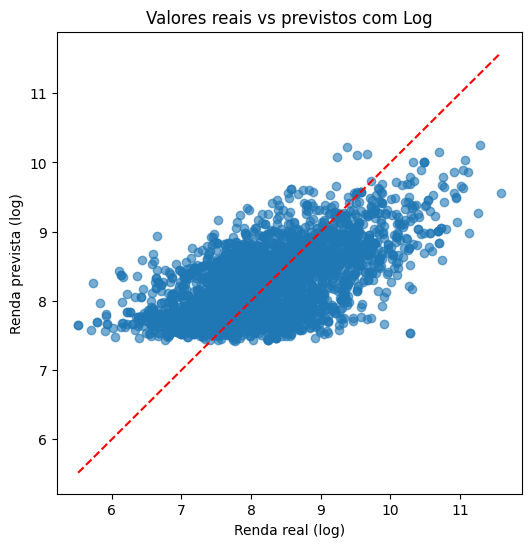

In [31]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel("Renda real (log)")
plt.ylabel("Renda prevista (log)")
plt.title("Valores reais vs previstos com Log")
plt.show()


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [32]:
import pickle


with open("modelo_renda.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
X_novo = pd.DataFrame([{
    "sexo_M": 1,                  
    "posse_de_imovel_True": 0,    
    "idade": 30,                  
    "tempo_emprego": 2.5          
}])


y_log_pred = model.predict(X_novo)[0]


renda_pred = float(np.exp(y_log_pred))

print(f"Renda estimada: R$ {renda_pred:,.2f}")

Renda estimada: R$ 4,197.55


In [34]:
# X = df[["sexo_M", "posse_de_imovel_True", "idade", "tempo_emprego"]]

df

,Unnamed:_0,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,educacao_Pos_graduacao,...,educacao_Superior_incompleto,tipo_residencia_Casa,tipo_residencia_Com_os_pais,tipo_residencia_Comunitario,tipo_residencia_Estudio,tipo_residencia_Governamental,estado_civil_Separado,estado_civil_Solteiro,estado_civil_Uniao,estado_civil_Viuvo
0,0,0,26,6.602740,1.0,8060.34,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
1,1,0,28,7.183562,2.0,1852.15,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False
2,2,0,35,0.838356,2.0,2253.89,False,True,True,False,...,False,True,False,False,False,False,False,False,False,False
3,3,1,30,4.846575,3.0,6600.77,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
4,4,0,33,4.293151,1.0,6475.97,True,True,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,0,32,9.849315,2.0,1592.57,True,True,False,False,...,True,True,False,False,False,False,False,False,False,False
14995,14995,0,48,13.887671,1.0,7990.58,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
14997,14997,0,45,7.832877,2.0,604.82,False,True,True,False,...,False,True,False,False,False,False,False,False,False,False
14998,14998,0,36,4.298630,2.0,3352.27,True,True,False,False,...,False,True,False,False,False,False,False,False,False,False
